# Malaria Disease Detection using Deep Learning

<h3>Description</h3>


Malaria is a potentially life-threatening infectious disease caused by parasites transmitted to humans through the bites of infected female Anopheles mosquitoes. It is prevalent in tropical and subtropical regions, particularly in Africa, South Asia, and South America.
The disease is caused by several species of the Plasmodium parasite, with Plasmodium falciparum being the most severe and responsible for the majority of malaria-related deaths. When an infected mosquito bites a person, it injects the parasite into their bloodstream. The parasites then travel to the liver, where they multiply and mature. From there, they invade red blood cells, causing them to rupture, leading to cycles of fever, chills, and flu-like symptoms.

Malaria can have serious health consequences, especially in vulnerable populations such as young children and pregnant women. If left untreated, it can result in severe anemia, organ damage, and even death. Symptoms typically include high fever, headache, fatigue, muscle aches, and vomiting. Prompt diagnosis and treatment are crucial to prevent complications and reduce the spread of the disease.

Malaria continues to be a significant global health challenge, affecting millions of people each year. However, concerted efforts by governments, organizations, and communities have resulted in significant progress in reducing malaria incidence and mortality rates in many regions. Ongoing research, improved diagnostic tools, and effective prevention and treatment strategies are crucial in the fight against malaria.

The origin of this disease is debatable, although most researchers believe that the disease has originated from the African continent. South American countries, the African countries and the Indian sub-continent are at a high risk of infection due to Malaria, mostly due it’s tropical climate which acts as a catalyst and breeding ground for an infected female mosquito which carries the plasmodium parasites which causes this diseases. Once an infected mosquito bites a human, the parasites enter the human blood stream and multiply in the host’s liver thereby destroying the red blood cells. The degree or an extent to which a cell is damaged basically depends on the type of parasite a person is infected with. If not diagnosed early, malaria can be severely life threatening. Nearly half a million people die each year due to this life threatening condition.

<h3>Business Objective</h3> 

The objective of this case study is to develop an automated malaria disease detection system using deep learning techniques. The current diagnostic process for malaria relies heavily on manual examination of blood smears, which is time-consuming, labor-intensive, and prone to human error. By leveraging the power of deep learning algorithms, the goal is to create a robust and efficient solution that can accurately identify malaria-infected cells from microscopic images, enabling early and accurate diagnosis of the disease.

<h3> Dataset Overview </h3>

The dataset is downloaded from Kaggle from this link — https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria. This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ and uploaded to a Kaggle repository. The dataset consists of two folders: "Infected" and "Uninfected," containing a total of 27,558 cell images. Within this dataset, 13,779 cell images are classified as infected with Malaria, while the remaining 13,779 images are classified as uninfected.

<h3> Real World Business Constraints </h3>


1.    <b>High precision and high recall</b>: The classifier needs to predict class labels accurately to maximize overall accuracy, ensuring both high precision and high recall.


2.     <b>Importance of predicting Parasitized class accurately</b>: The cost of incorrect predictions on Parasitized cells is high, as it can impact a patient's treatment plan. The model should prioritize predicting the Parasitized class with high accuracy.


3.    <b>Acceptable latency</b>: While there are no strict latency constraints, the model should be able to predict the outcome of a single cell image within a few seconds. It should not take hours, although millisecond or microsecond requirements are not necessary.


4.    <b>Minimizing false negatives</b>: It is crucial to minimize false negatives to avoid declaring a patient suffering from Malaria as fit, as this could have severe consequences for their treatment.


5.    <b>Monitoring overfitting</b>: It is important to monitor the train and test loss graphs to ensure the model does not overfit. Overfitting leads to high variance and poor generalization on unseen data, so the model should generalize well to new samples.

<h3>Type of Machine Learning Problem</h3>


The given machine learning problem is a binary classification problem. Given a cell image as input, the objective is to predict whether the cell is infected with Malaria or not.

<h3> Evaluation Metrics </h3>

1. Accuracy
2. Precision
3. Recall
4. Binary Confusion Matrix

<h3> References </h3>

1. https://medium.com/@srivathsagottipati/can-we-detect-malaria-with-the-help-of-deep-learning-9ac94e6cd266
2.https://medium.com/@saugata.paul1010/a-case-study-on-malaria-detection-using-cell-images-and-deep-convolution-neural-networks-in-keras-8d07356a3d05

In [17]:
#importing useful libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import imageio
from datetime import datetime as dt
from PIL import Image
from tqdm import tqdm
#Importing the deep learning libraries
#from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
from keras.optimizers import RMSprop
from keras import regularizers as reg
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
from keras import optimizers
from keras.callbacks import History

%matplotlib inline

In [29]:
!pip install kaggle

<h4>Downloading Dataset</h4>

In [49]:
import kaggle

# Downloading the Dataset through Kaggle Api and Unzipping 
kaggle.api.dataset_download_files('iarunava/cell-images-for-detecting-malaria', path='dataset/', unzip=True)

In [50]:
import os

# Get all the filenames from the original "cell_images" data folder
parasitized_filenames = os.listdir("dataset/cell_images/Parasitized")
uninfected_filenames = os.listdir("dataset/cell_images/Uninfected")

# Get details about the number of images present
print("Number of images of type 'Parasitized':", len(parasitized_filenames))
print("Number of images of type 'Uninfected':", len(uninfected_filenames))

Number of images of type 'Parasitized': 13780
Number of images of type 'Uninfected': 13780


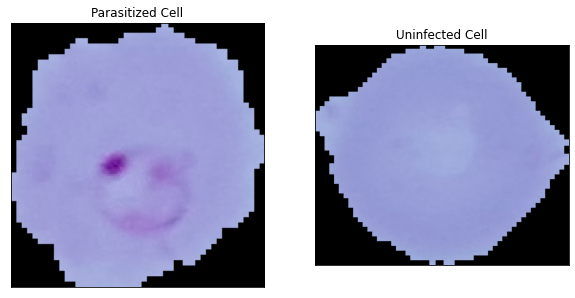

In [73]:
# plotting the sample iamges for both the classes

parasitized_image='dataset/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'
uninfected_image='dataset/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'
plt.figure(1, figsize = (10 , 5))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(parasitized_image))
plt.title('Parasitized Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(uninfected_image))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [51]:
# Create necessary folders if they don't exist
# We will create train, test and validation folders. Inside each of the parent folders, we will create individual folder structure for Parasitized and Uninfected cell images
os.makedirs(r'C:\Users\uytu\Desktop\Prince\Malaria Malware Detection Jupyter Notebook\data\train\Parasitized', exist_ok=True)
os.makedirs(r'C:\Users\uytu\Desktop\Prince\Malaria Malware Detection Jupyter Notebook\data\train\Uninfected', exist_ok=True)
os.makedirs(r'C:\Users\uytu\Desktop\Prince\Malaria Malware Detection Jupyter Notebook\data\validation\Parasitized', exist_ok=True)
os.makedirs(r'C:\Users\uytu\Desktop\Prince\Malaria Malware Detection Jupyter Notebook\data\validation\Uninfected', exist_ok=True)
os.makedirs(r'C:\Users\uytu\Desktop\Prince\Malaria Malware Detection Jupyter Notebook\data\test\Parasitized', exist_ok=True)
os.makedirs(r'C:\Users\uytu\Desktop\Prince\Malaria Malware Detection Jupyter Notebook\data\test\Uninfected', exist_ok=True)

<h4> Train Test Split</h4>

The data will be divided into three sets - train, test, and validation - using random sampling. Each class will have 8000 images for training and 3000 images for validation, for a total of 11000 images used to train our models. To evaluate our models' performance on completely new images, we will reserve the remaining 2779 images for each class as test data..

<h4>Image Data Preprocessing and Splitting for Parasitized Images</h4>

In [14]:
def resize_image(image_path):
  '''
  Function to resize an image into 128 *128
  '''
  resized_image = cv2.resize(image_path, (128,128), interpolation = cv2.INTER_AREA) # cv2.INTER_AREA: This is used when we need to shrink an image.

  return resized_image


In [53]:
# Image Data Preprocessing and splitting the images into train, validation and test for parasitized image
# Specify the location of the Parasitized folder
par_folder_path = "C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/dataset/cell_images/Parasitized"

# Randomly sample Parasitized images for train, test, and validation split
par_train_images = random.sample(parasitized_filenames, 8000)
par_val_images = random.sample(list(set(parasitized_filenames) - set(par_train_images)), 3000) #excluding file names which are present in train
par_test_images = list(set(parasitized_filenames) - set(par_train_images) - set(par_val_images)) # excluding file name which are already in train and validation


# Create train folder and save resized images
for file in tqdm(par_train_images):
    if file.endswith("png"):
        image = imageio.imread(os.path.join(par_folder_path, file)) # reading and image --> returns a numpy array, which comes with a dict of meta data at its ‘meta’ attribute.
        resized_image = resize_image(image) # resizing the image into 128 *128
        imageio.imsave(os.path.join("/data/train/Parasitized", file), resized_image) # saving all the resized images in the train's parastized folder
print("Train folder created for Parasitized images...")

# Create validation folder and save resized images
for file in tqdm(par_val_images):
    if file.endswith("png"):
        image = imageio.imread(os.path.join(par_folder_path, file))
        resized_image = resize_image(image)
        imageio.imsave(os.path.join("data/validation/Parasitized", file), resized_image)
print("Validation folder created for Parasitized images...")

# Create test folder and save resized images
for file in tqdm(par_test_images):
    if file.endswith("png"):
        image = imageio.imread(os.path.join(par_folder_path, file))
        resized_image = resize_image(image)
        imageio.imsave(os.path.join("data/test/Parasitized", file), resized_image)
print("Test folder created for Parasitized images...")


100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [03:43<00:00, 35.82it/s]


Train folder created for Parasitized images...


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [01:23<00:00, 36.04it/s]


Validation folder created for Parasitized images...


100%|██████████████████████████████████████████████████████████████████████████████| 2780/2780 [01:17<00:00, 36.01it/s]

Test folder created for Parasitized images...


<h4>Image Data Preprocessing and Splitting for Uninfected Images</h4>

In [54]:
# Specify the location of the Uninfected folder
# Image Data Preprocessing and splitting the images into train, validation and test for Uninfected  images
unin_folder_path = "C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/dataset/cell_images/Uninfected"

# Randomly sample Uninfected images for train, test, and validation split
unin_train_images = random.sample(uninfected_filenames, 8000)
unin_val_images = random.sample(list(set(uninfected_filenames) - set(unin_train_images)), 3000)
unin_test_images = list(set(uninfected_filenames) - set(unin_train_images) - set(unin_val_images))

# Create train folder and save resized images
for file in tqdm(unin_train_images):
    if file.endswith("png"):
        image = imageio.imread(os.path.join(unin_folder_path, file))
        resized_image = resize_image(image)
        imageio.imsave(os.path.join("data/train/Uninfected", file), resized_image)
print("Train folder created for Uninfected images...")

# Create validation folder and save resized images
for file in tqdm(unin_val_images):
    if file.endswith("png"):
        image = imageio.imread(os.path.join(unin_folder_path, file))
        resized_image = resize_image(image)
        imageio.imsave(os.path.join("data/validation/Uninfected", file), resized_image)
print("Validation folder created for Uninfected images...")

# Create test folder and save resized images
for file in tqdm(unin_test_images):
    if file.endswith("png"):
        image = imageio.imread(os.path.join(unin_folder_path, file))
        resized_image = resize_image(image)
        imageio.imsave(os.path.join("data/test/Uninfected", file), resized_image)
print("Test folder created for Uninfected images...")


100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [04:09<00:00, 32.00it/s]


Train folder created for Uninfected images...


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [01:33<00:00, 31.95it/s]


Validation folder created for Uninfected images...


100%|██████████████████████████████████████████████████████████████████████████████| 2780/2780 [01:27<00:00, 31.93it/s]

Test folder created for Uninfected images...


When we examine the dataset carefully, Some images at the start of the are different from the ones at the end. To help our models learn more features from both groups, we need to pick pictures randomly. This way, our model will not become too focused on just one type of picture and will be better at recognizing all kinds of images of a particular class. If we don't pick pictures randomly, our model might only learn from a few pictures and not work well when shown new pictures.

<h4>Train Data Preparation</h4>

In [55]:
# Train Data Preparation
train_file_names = [] # list to store the image files name of train data for both parasitized and uninfected

train_file_parasitized = []
for file_name in os.listdir("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Parasitized"):
    train_file_parasitized.append("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Parasitized/"+file_name)

print(train_file_parasitized)
train_file_uninfected = []
for file_name in os.listdir("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Uninfected"):
    train_file_uninfected.append("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Uninfected/"+file_name)
print(train_file_uninfected)
train_file_names = train_file_parasitized + train_file_uninfected

X_train = [imageio.imread(image) for image in train_file_names] # Read each image file from the train data
X_train = np.array(X_train) # Converting into numpy array

# Generating Class label for train data
#y_train = ["Parasitized"]*8000 + ["Uninfected"]*8000
y_train =  ["Parasitized"]*len(train_file_parasitized) + ["Uninfected"]*len(train_file_uninfected)

['C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/train/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_1

In [56]:
print("train_file_parasitized :",len(train_file_parasitized))
print("train_file_parasitized :",len(train_file_uninfected))

train_file_parasitized : 7999
train_file_parasitized : 8000


<h4>Validation Data Preparation</h4>

In [57]:
# Validation Data
val_file_names = []  # List to store the image file names of validation data for both parasitized and uninfected

val_file_parasitized = []
for file_name in os.listdir("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Parasitized"):
    val_file_parasitized.append("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Parasitized/" + file_name)

print(val_file_parasitized)

val_file_uninfected = []
for file_name in os.listdir("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Uninfected"):
    val_file_uninfected.append("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Uninfected/" + file_name)

print(val_file_uninfected)

val_file_names = val_file_parasitized + val_file_uninfected

X_val = [imageio.imread(image) for image in val_file_names]  # Read each image file from the validation data
X_val = np.array(X_val)  # Converting into numpy array

# Generating Class label for validation data
y_val = ["Parasitized"] * len(val_file_parasitized) + ["Uninfected"] * len(val_file_uninfected)


['C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_138.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Parasitized/C100P61ThinF_IMG_20150918_144823_cell_158.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Parasitized/C100P61ThinF_IMG_20150918_145042_cell_166.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Parasitized/C100P61ThinF_IMG_20150918_145422_cell_166.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Parasitized/C100P61ThinF_IMG_20150918_145609_cell_147.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/validation/Parasitized/C100

In [58]:
print("val_file_parasitized :",len(val_file_parasitized))
print("val_file_parasitized :",len(val_file_uninfected))

val_file_parasitized : 3000
val_file_parasitized : 3000


<h4> Test Data Preparation </h4>

In [59]:
# Test Data
test_file_names = []  # List to store the image file names of test data for both parasitized and uninfected

test_file_parasitized = []
for file_name in os.listdir("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Parasitized"):
    test_file_parasitized.append("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Parasitized/" + file_name)

print(test_file_parasitized)

test_file_uninfected = []
for file_name in os.listdir("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Uninfected"):
    test_file_uninfected.append("C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Uninfected/" + file_name)

print(test_file_uninfected)

test_file_names = test_file_parasitized + test_file_uninfected

X_test = [imageio.imread(image) for image in test_file_names]  # Read each image file from the test data
X_test = np.array(X_test)  # Converting into numpy array

# Generating Class label for test data
y_test = ["Parasitized"] * len(test_file_parasitized) + ["Uninfected"] * len(test_file_uninfected)


['C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_139.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_142.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Parasitized/C100P61ThinF_IMG_20150918_145042_cell_164.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Parasitized/C100P61ThinF_IMG_20150918_145422_cell_163.png', 'C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/data/test/Parasitized/C100P61ThinF_IMG_20150918_145422_cell_167.png'

In [60]:
print("test_file_parasitized :",len(test_file_parasitized))
print("test_file_parasitized :",len(test_file_uninfected))

test_file_parasitized : 2780
test_file_parasitized : 2779


In [61]:
print("Shape of Train Set : ",X_train.shape)
print("Shape of Validation Set : ",X_val.shape)
print("Shape of Test Set : ",X_test.shape)

Shape of Train Set :  (15999, 128, 128, 3)
Shape of Validation Set :  (6000, 128, 128, 3)
Shape of Test Set :  (5559, 128, 128, 3)


Here, we can see that all the images now have equal dimension of 128 by 128 pixels each with 3 channels — R,G,B

<h4>Data Scaling: Scaling the Values between 0 and 1</h4>

In [62]:
#Scaling all the values between 0 and 1
X_train = X_train.astype('float32')
X_val  = X_val.astype('float32')
X_test  = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

<h4> Storing Data into pickle files </h4>

In [65]:
# Storing all the train test validation data into a pickle file
import pickle
with open('X_train_pkl', 'wb') as files:
    pickle.dump(X_train, files)
with open('X_val_pkl', 'wb') as files:
    pickle.dump(X_val, files)
with open('X_test_pkl', 'wb') as files:
    pickle.dump(X_test, files)

<h4>Retrieving Train, Test, and Validation Data from Pickle Files</h4>

In [4]:
# Loading Stored pickle file

# Load X_train from pickle file
import pickle
with open('X_train_pkl', 'rb') as file:
    X_train = pickle.load(file)

# Load X_val from pickle file
with open('X_val_pkl', 'rb') as file:
    X_val = pickle.load(file)

# Load X_test from pickle file
with open('X_test_pkl', 'rb') as file:
    X_test = pickle.load(file)

In [5]:
# Generating class labels
y_train =  ["Parasitized"]*7999 + ["Uninfected"]*8000
y_val =  ["Parasitized"]*3000 + ["Uninfected"]*3000
y_test = ["Parasitized"]*2780 + ["Uninfected"]*2779

<h4>Visualizing Sample Images of Parasitized and Uninfected Cells</h4>

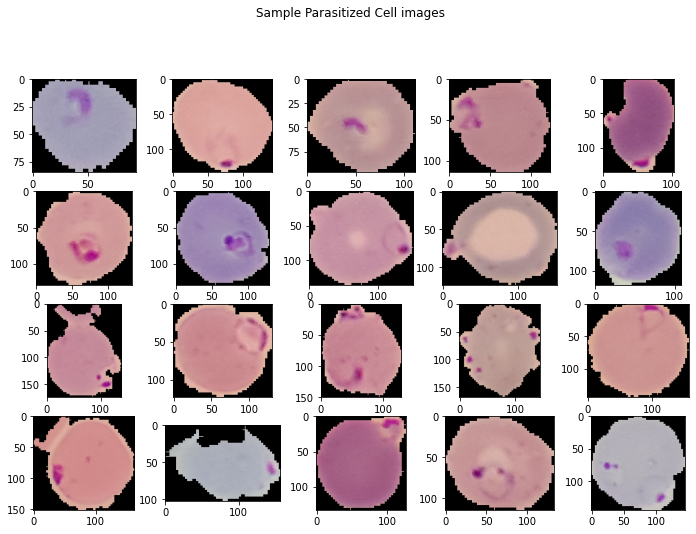

In [66]:
parasitized_path = "C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/dataset/cell_images/Parasitized/"
filenames=random.sample(os.listdir(parasitized_path),21) # randomly sampling 26 images from the parasitized folder

#Display 25 images from Parasitized cells

plt.figure(figsize=(12,10))
plt.suptitle("Sample Parasitized Cell images")
for i in range(1,len(filenames)):
    
    row = i
    image = imageio.imread(parasitized_path+filenames[i]) # reading image files
    plt.subplot(5,5,row)
    plt.imshow(image)
    
plt.show()


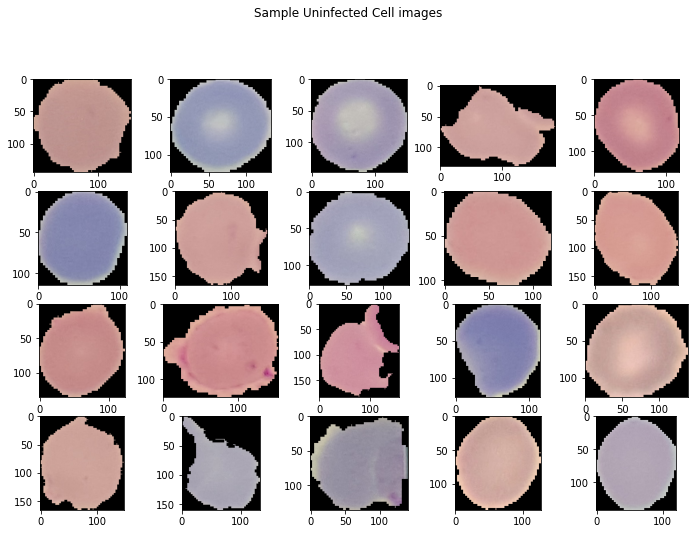

In [67]:
uninfected_path = "C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/dataset/cell_images/Uninfected/"
filenames=random.sample(os.listdir(uninfected_path),21) # randomly sampling 26 images from the Uninfected folder

#Display 20 images from Uninfected cells

plt.figure(figsize=(12,10))
plt.suptitle("Sample Uninfected Cell images")
for i in range(1,len(filenames)):   
    row = i
    image = imageio.imread(uninfected_path+filenames[i]) # reading image files
    plt.subplot(5,5,row)
    plt.imshow(image) 
plt.show()

Observations : 

*   By looking at the above sample images of both the classes given above, we can see that Parasitized cells have some red round shapes in them, but the uninfected cells don't have those shapes. So, we can say with that these red shapes can help us determine if a cell has Malaria or not.


*   Moreover, if we closely examine the uninfected cells in the pictures, we can see that they are generally round in shape. However, the infected cells appear to be distorted and not as round as the uninfected cells.

<h4> Encoding Class Labels</h4>

In [14]:
# Encoding the Class Labels

#Encode the class labels to binary vectors
# Parasitized --> 1
# Uninfected --> 0
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(y_train)

#y_train_enc=encoder.transform(y_train)
#y_val_enc=encoder.transform(y_val)
#y_test_enc= encoder.transform(y_test)

In [6]:
label_mapping = {'Parasitized': 1, 'Uninfected': 0}

# Encode the class labels using the label_mapping dictionary
y_train_enc = [label_mapping[label] for label in y_train]
y_val_enc = [label_mapping[label] for label in y_val]
y_test_enc = [label_mapping[label] for label in y_test]

y_train_enc =np.array(y_train_enc)
y_val_enc =np.array(y_val_enc)
y_test_enc = np.array(y_test_enc)

<h3>Models</h3>

In [7]:
# Defining some of the model parameters
# Create folder if it doesn't exist
if not os.path.exists("Models"):
    os.mkdir("Models")
#model_save_path = "C:/Users/uytu/Desktop/Prince/Malaria Malware Detection Jupyter Notebook/Models/"
input_shape = (128, 128, 3) # channels , width , height
epochs = 20
batch_size = 20

<h4>Building our first baseline CNN model</h4>

In [42]:
model_1 = Sequential()

model_1.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 28800)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [46]:
# Model Training
model_1.fit(x=X_train, y=y_train_enc,
          validation_data=(X_val, y_val_enc),
          epochs=epochs,
          verbose=1,
          callbacks=[History()])

Epoch 1/20
500/500 [==============================] - 81s 160ms/step - loss: 0.4580 - accuracy: 0.7798 - val_loss: 0.2188 - val_accuracy: 0.9253
Epoch 2/20
500/500 [==============================] - 77s 153ms/step - loss: 0.1995 - accuracy: 0.9260 - val_loss: 0.1900 - val_accuracy: 0.9413
Epoch 3/20
500/500 [==============================] - 76s 151ms/step - loss: 0.1532 - accuracy: 0.9452 - val_loss: 0.2035 - val_accuracy: 0.9368
Epoch 4/20
500/500 [==============================] - 79s 159ms/step - loss: 0.1231 - accuracy: 0.9556 - val_loss: 0.2167 - val_accuracy: 0.9362
Epoch 5/20
500/500 [==============================] - 82s 164ms/step - loss: 0.0918 - accuracy: 0.9693 - val_loss: 0.2237 - val_accuracy: 0.9310
Epoch 6/20
500/500 [==============================] - 80s 160ms/step - loss: 0.0651 - accuracy: 0.9762 - val_loss: 0.2636 - val_accuracy: 0.9387
Epoch 7/20
500/500 [==============================] - 86s 171ms/step - loss: 0.0374 - accuracy: 0.9871 - val_loss: 0.3023 - val_ac

Based on the provided training results, it appears that the model is overfitting to the training data. Here are some key observations:

Training Accuracy: The training accuracy steadily improves with each epoch, reaching a high value of 0.9990. This indicates that the model is able to fit the training data very well.

Validation Accuracy: The validation accuracy initially increases, peaking at 0.9413 in the second epoch. However, it starts to decline or plateau afterwards, reaching 0.9357 in the final epoch. This suggests that the model's performance on unseen data is not as good as its performance on the training data.

Training Loss: The training loss consistently decreases over the epochs, reaching a very low value of 0.0034. This indicates that the model is fitting the training data closely.

Validation Loss: The validation loss shows some fluctuations but remains generally higher than the training loss. In the final epoch, the validation loss is 0.6734, which is relatively high compared to the training loss. This suggests that the model is not effectively capturing the underlying patterns in the validation data.

Overall, these observations point towards overfitting, where the model becomes too specialized in fitting the training data and struggles to generalize well to unseen data.

In [47]:
# saving model
model_1.save("Models/basic_model_cnn.h5")

# saving model history
with open('Models/history_basic_model_cnn_.pkl', 'wb') as file:
    pickle.dump(model_1.history, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-23 14:26:46         3090
metadata.json                                  2023-05-23 14:26:46           64
variables.h5            

In [5]:
 model_1 = keras.models.load_model('Models/basic_model_cnn.h5')

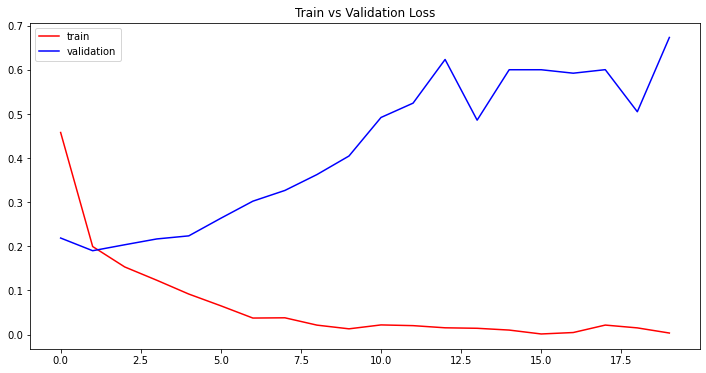

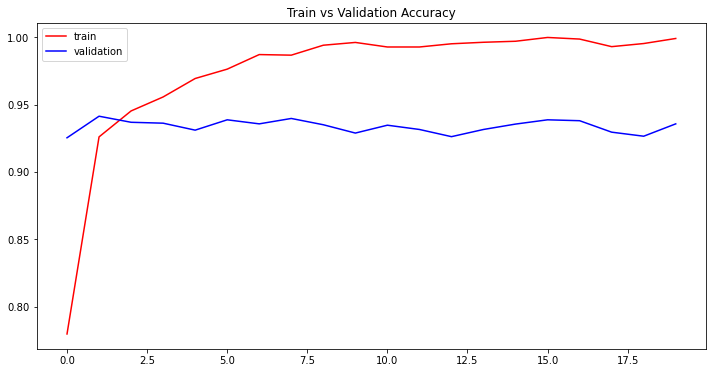

In [48]:
#Get model history
history=model_1.history

# Train vs Validation loss
plt.figure(figsize=(12, 6))
plt.title("Train vs Validation Loss")
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


# Train vs Validation Accuracy
plt.figure(figsize=(12, 6))
plt. title("Train vs Validation Accuracy")
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [50]:
# Trin , Validation and Test Accuracy
train_loss, train_accuracy = model_1.evaluate(x=X_train, y=y_train_enc, verbose=0)
val_loss, val_accuracy = model_1.evaluate(x=X_val, y=y_val_enc, verbose=0)
test_loss, test_accuracy = model_1.evaluate(x=X_test, y=y_test_enc, verbose=0)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:" , val_accuracy)
print("Test_Accuracy:" ,test_accuracy)

Train Accuracy: 1.0
Validation Accuracy: 0.9356666803359985
Test_Accuracy: 0.9435150027275085


In [51]:
# Classification Report
from sklearn.metrics import classification_report

y_pred = model_1.predict(X_test)  # Get predicted labels
#y_train_enc = y_test  # Get true labels

#y_pred_classes = np.argmax(y_pred, axis=1)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
# Print classification report
report = classification_report(y_test_enc, y_pred_classes)
print(report)

174/174 [==============================] - 5s 26ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2779
           1       0.96      0.93      0.94      2780

    accuracy                           0.94      5559
   macro avg       0.94      0.94      0.94      5559
weighted avg       0.94      0.94      0.94      5559



174/174 [==============================] - 4s 25ms/step


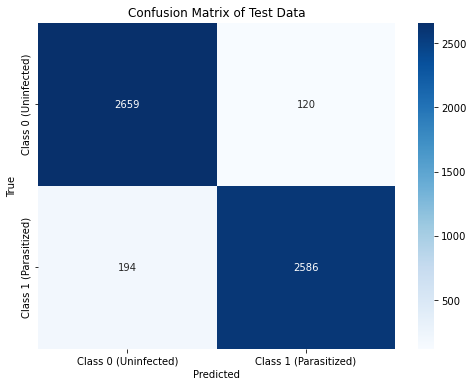

In [56]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model_1.predict(X_test)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
cm = confusion_matrix(y_test_enc, y_pred_classes)
labels = ['Class 0 (Uninfected)', 'Class 1 (Parasitized)']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Test Data')
plt.show()

The model performed well with an accuracy of 94.35% on the test data. It correctly identified infected and uninfected cell images with high precision and recall values. However, there were some instances where uninfected cells were mistakenly classified as infected, and infected cells were mistakenly classified as uninfected. To improve the model, we need to focus on reducing these mistakes. Overall, the model showed good performance, but we need to work on accurately identifying infected cells.

<h4>Building a deep CNN with Dropout + proper weight initialization</h4>

In [62]:
from tensorflow.keras import optimizers
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,kernel_initializer ="he_normal"))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())

model_2.add(Dense(512, activation='relu' , kernel_initializer = "he_uniform"))
model_2.add(Dropout(rate = 0.5))

model_2.add(Dense(512, activation='relu', kernel_initializer = "he_uniform"))
model_2.add(Dropout(rate = 0.5))


model_2.add(Dense(1, activation='sigmoid' , kernel_initializer ="glorot_uniform"))

model_2.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-6),metrics=['accuracy'])

model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 128)     

In [63]:
# Model Training
model_2.fit(x=X_train, y=y_train_enc,
          validation_data=(X_val, y_val_enc),
          epochs=epochs,
          verbose=1,
          callbacks=[History()])

Epoch 1/20
500/500 [==============================] - 182s 358ms/step - loss: 0.4986 - accuracy: 0.7520 - val_loss: 0.1435 - val_accuracy: 0.9583
Epoch 2/20
500/500 [==============================] - 171s 341ms/step - loss: 0.1638 - accuracy: 0.9500 - val_loss: 0.1508 - val_accuracy: 0.9575
Epoch 3/20
500/500 [==============================] - 169s 338ms/step - loss: 0.1511 - accuracy: 0.9517 - val_loss: 0.1510 - val_accuracy: 0.9562
Epoch 4/20
500/500 [==============================] - 172s 343ms/step - loss: 0.1409 - accuracy: 0.9557 - val_loss: 0.1476 - val_accuracy: 0.9587
Epoch 5/20
500/500 [==============================] - 169s 338ms/step - loss: 0.1312 - accuracy: 0.9582 - val_loss: 0.1314 - val_accuracy: 0.9595
Epoch 6/20
500/500 [==============================] - 186s 372ms/step - loss: 0.1244 - accuracy: 0.9589 - val_loss: 0.1473 - val_accuracy: 0.9575
Epoch 7/20
500/500 [==============================] - 186s 373ms/step - loss: 0.1202 - accuracy: 0.9595 - val_loss: 0.1413 -

The model's performance on the training data:

The training accuracy steadily improves throughout the epochs, reaching 98.69% in the final epoch.
The training loss consistently decreases, indicating that the model is learning to fit the training data well.
The model's performance on the validation data:

The validation accuracy fluctuates but generally remains high, with a peak of 96.33% in the tenth epoch.
The validation loss shows some fluctuations but generally remains relatively low.
Comparing training and validation results:

The training accuracy is consistently higher than the validation accuracy, suggesting some degree of overfitting.
The training loss is consistently lower than the validation loss, further indicating overfitting.
Based on these observations, it appears that the model achieves good performance on both the training and validation data. However, the decreasing validation accuracy and the relatively higher validation loss compared to the training loss in later epochs suggest that the model might be overfitting to the training data. 

In [64]:
# saving model
model_2.save("Models/cnn_dropout_weight.h5")

# saving model history
with open('Models/history_basic_cnn_dropout_weight.pkl', 'wb') as file:
    pickle.dump(model_2.history, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...layers\max_pooling2d_3
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:

In [12]:
# Loading Model 
model_2 = keras.models.load_model('Models/cnn_dropout_weight.h5')

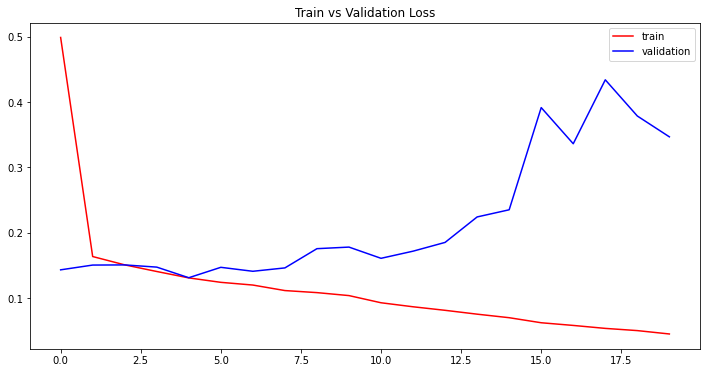

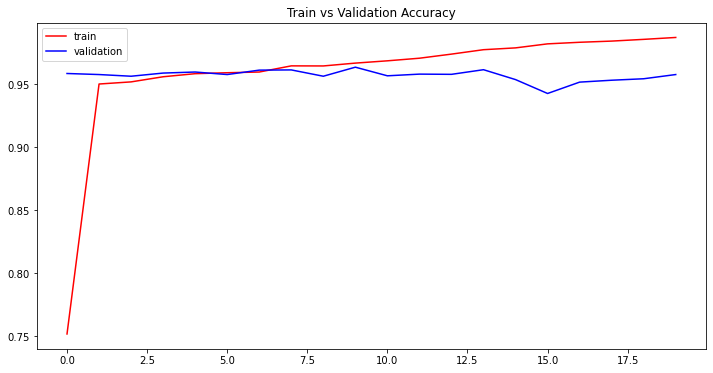

In [65]:
#Get model history
history=model_2.history

# Train vs Validation loss
plt.figure(figsize=(12, 6))
plt.title("Train vs Validation Loss")
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


# Train vs Validation Accuracy
plt.figure(figsize=(12, 6))
plt. title("Train vs Validation Accuracy")
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [66]:
# Train, Validation and Test Accuracy
train_loss, train_accuracy = model_2.evaluate(x=X_train, y=y_train_enc, verbose=0)
val_loss, val_accuracy = model_2.evaluate(x=X_val, y=y_val_enc, verbose=0)
test_loss, test_accuracy = model_2.evaluate(x=X_test, y=y_test_enc, verbose=0)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:" , val_accuracy)
print("Test_Accuracy:" ,test_accuracy)

Train Accuracy: 0.9928120374679565
Validation Accuracy: 0.9574999809265137
Test_Accuracy: 0.9553876519203186


In [67]:
# Classification Report
from sklearn.metrics import classification_report

y_pred = model_2.predict(X_test)  # Get predicted labels
#y_train_enc = y_test  # Get true labels

#y_pred_classes = np.argmax(y_pred, axis=1)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
# Print classification report
report = classification_report(y_test_enc, y_pred_classes)
print(report)

174/174 [==============================] - 11s 60ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2779
           1       0.96      0.95      0.96      2780

    accuracy                           0.96      5559
   macro avg       0.96      0.96      0.96      5559
weighted avg       0.96      0.96      0.96      5559



174/174 [==============================] - 10s 56ms/step


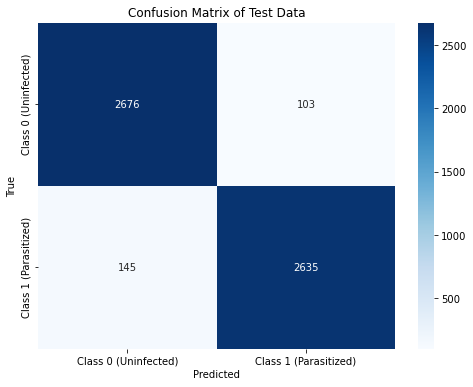

In [68]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model_2.predict(X_test)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
cm = confusion_matrix(y_test_enc, y_pred_classes)
labels = ['Class 0 (Uninfected)', 'Class 1 (Parasitized)']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Test Data')
plt.show()

The model performed well with a high accuracy of 95.54% on the test data, showing its ability to generalize to new, unseen samples. It effectively identified both uninfected and parasitized cell images with high precision and recall values. However, there were some cases where uninfected cells were mistakenly classified as parasitized, and vice versa. However, there are 45 instances of false negatives, where parasitized cells were mistakenly classified as uninfected. To improve the model's performance, we will explore different models and techniques to minimize these false negatives.

<h4>Building a deep CNN with Dropout + proper weight initialization + Batch Normalization</h4>

In [6]:
from tensorflow.keras import optimizers
model_3 = Sequential()

model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,kernel_initializer ="he_normal"))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())

model_3.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())


model_3.add(Flatten())

model_3.add(Dense(512, activation='relu' , kernel_initializer = "he_uniform"))
model_3.add(Dropout(rate = 0.5))
model_3.add(BatchNormalization())


model_3.add(Dense(512, activation='relu', kernel_initializer = "he_uniform"))
model_3.add(Dropout(rate = 0.5))
model_3.add(BatchNormalization())


model_3.add(Dense(1, activation='sigmoid' , kernel_initializer ="glorot_uniform"))

model_3.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-6),metrics=['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [14]:
# Model Training
model_3.fit(x=X_train, y=y_train_enc,
          validation_data=(X_val, y_val_enc),
          epochs=epochs,
          verbose=1,
          callbacks=[History()])

Epoch 1/20
500/500 [==============================] - 190s 378ms/step - loss: 0.2624 - accuracy: 0.9138 - val_loss: 0.1387 - val_accuracy: 0.9587
Epoch 2/20
500/500 [==============================] - 181s 363ms/step - loss: 0.1385 - accuracy: 0.9552 - val_loss: 0.1164 - val_accuracy: 0.9600
Epoch 3/20
500/500 [==============================] - 179s 359ms/step - loss: 0.1332 - accuracy: 0.9552 - val_loss: 0.1116 - val_accuracy: 0.9622
Epoch 4/20
500/500 [==============================] - 179s 359ms/step - loss: 0.1273 - accuracy: 0.9567 - val_loss: 0.1169 - val_accuracy: 0.9650
Epoch 5/20
500/500 [==============================] - 168s 337ms/step - loss: 0.1228 - accuracy: 0.9586 - val_loss: 0.1239 - val_accuracy: 0.9633
Epoch 6/20
500/500 [==============================] - 169s 337ms/step - loss: 0.1197 - accuracy: 0.9607 - val_loss: 0.1151 - val_accuracy: 0.9642
Epoch 7/20
500/500 [==============================] - 175s 351ms/step - loss: 0.1114 - accuracy: 0.9617 - val_loss: 0.1556 -

In [15]:
# saving model
model_3.save("Models/cnn_dropout_weight_batchnorm_dataaug.h5")

# saving model history
with open('Models/history_cnn_dropout_weight_batchnorm_dataaug.pkl', 'wb') as file:
    pickle.dump(model_3.history, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...layers\max_pooling2d_3
......v

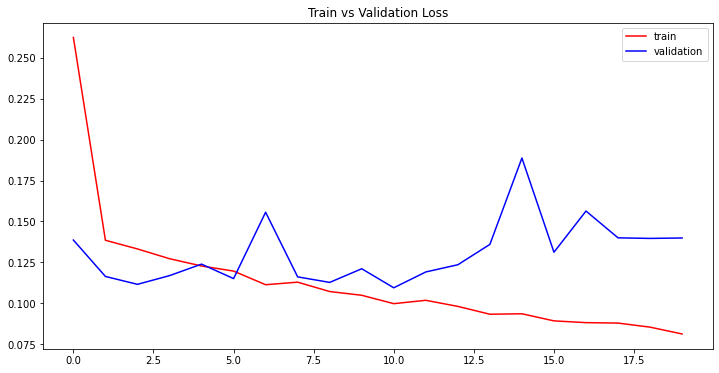

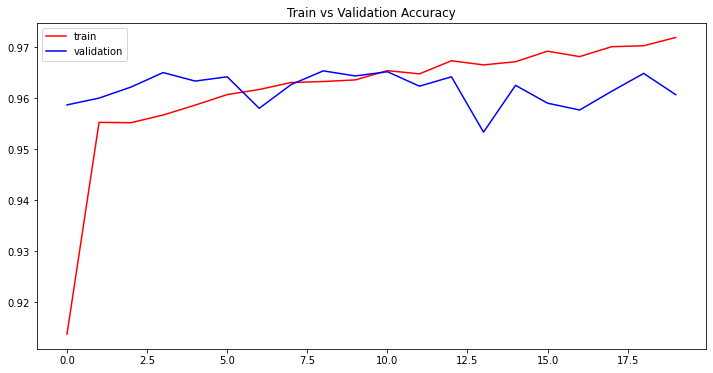

In [16]:
#Get model history
history=model_3.history

# Train vs Validation loss
plt.figure(figsize=(12, 6))
plt.title("Train vs Validation Loss")
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


# Train vs Validation Accuracy
plt.figure(figsize=(12, 6))
plt. title("Train vs Validation Accuracy")
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
# Train, Validation, Test Accuracy
train_loss, train_accuracy = model_3.evaluate(x=X_train, y=y_train_enc, verbose=0)
val_loss, val_accuracy = model_3.evaluate(x=X_val, y=y_val_enc, verbose=0)
test_loss, test_accuracy = model_3.evaluate(x=X_test, y=y_test_enc, verbose=0)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:" , val_accuracy)
print("Test_Accuracy:" ,test_accuracy)

Train Accuracy: 0.9771860837936401
Validation Accuracy: 0.9606666564941406
Test_Accuracy: 0.958985447883606


In [20]:
# Classification Report
from sklearn.metrics import classification_report

y_pred = model_3.predict(X_test)  # Get predicted labels
#y_train_enc = y_test  # Get true labels

#y_pred_classes = np.argmax(y_pred, axis=1)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
# Print classification report
report = classification_report(y_test_enc, y_pred_classes)
print(report)

174/174 [==============================] - 11s 62ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2779
           1       0.97      0.95      0.96      2780

    accuracy                           0.96      5559
   macro avg       0.96      0.96      0.96      5559
weighted avg       0.96      0.96      0.96      5559



174/174 [==============================] - 14s 75ms/step


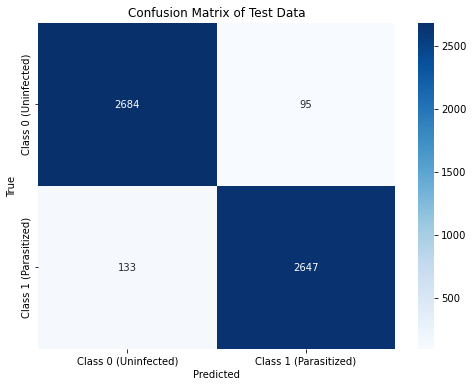

In [21]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model_3.predict(X_test)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
cm = confusion_matrix(y_test_enc, y_pred_classes)
labels = ['Class 0 (Uninfected)', 'Class 1 (Parasitized)']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Test Data')
plt.show()

Our model has achieved impressive results on the test data, achieving an accuracy of 95.90%. One notable improvement is the good reduction in false negatives compared to our previous model.

<h4>ResNet 50</h4>

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load the ResNet-50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
# Add our own classification layers on top
model_4=Sequential()
model_4.add(base_model)
model_4.add(Flatten())
model_4.add(Dense(1024,activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(1,activation='sigmoid'))

model_4.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])


# Compile the model

# Print the summary of the model
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              33555456  
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 57,144,193
Trainable params: 57,091,073
Non-trainable params: 53,120
_________________________________________________________________


In [11]:
# Model Training
model_4.fit(x=X_train, y=y_train_enc,
          validation_data=(X_val, y_val_enc),
          epochs=10,
          verbose=1,
          callbacks=[History()])

#model_1.save(model_save_path + "basic_model_cnn.h5")

Epoch 1/10
500/500 [==============================] - 1467s 3s/step - loss: 0.8387 - accuracy: 0.8776 - val_loss: 1.0834 - val_accuracy: 0.5000
Epoch 2/10
500/500 [==============================] - 1457s 3s/step - loss: 0.1614 - accuracy: 0.9511 - val_loss: 0.2420 - val_accuracy: 0.9163
Epoch 3/10
500/500 [==============================] - 1657s 3s/step - loss: 0.1472 - accuracy: 0.9546 - val_loss: 0.2485 - val_accuracy: 0.9532
Epoch 4/10
500/500 [==============================] - 1586s 3s/step - loss: 0.1368 - accuracy: 0.9570 - val_loss: 0.2044 - val_accuracy: 0.9615
Epoch 5/10
500/500 [==============================] - 1552s 3s/step - loss: 0.1270 - accuracy: 0.9581 - val_loss: 0.1583 - val_accuracy: 0.9630
Epoch 6/10
500/500 [==============================] - 1497s 3s/step - loss: 0.1206 - accuracy: 0.9604 - val_loss: 0.1938 - val_accuracy: 0.9578
Epoch 7/10
500/500 [==============================] - 1521s 3s/step - loss: 0.1190 - accuracy: 0.9598 - val_loss: 0.1907 - val_accuracy:

In [13]:
# saving model
model_4.save("Models/ResNet50.h5")

# saving model history
with open('Models/history_ResNet50.pkl', 'wb') as file:
    pickle.dump(model_4.history, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\functional
......vars
...layers\functional\layers\activation
......vars
...layers\functional\layers\activation_1
......vars
...layers\functional\layers\activation_10
......vars
...layers\functional\layers\activation_11
......vars
...layers\functional\layers\activation_12
......vars
...layers\functional\layers\activation_13
......vars
...layers\functional\layers\activation_14
......vars
...layers\functional\layers\activation_15
......vars
...layers\functional\layers\activation_16
......vars
...layers\functional\layers\activation_17
......vars
...layers\functional\layers\activation_18
......vars
...layers\functional\layers\activation_19
......vars
...layers\functional\layers\activation_2
......vars
...layers\functional\layers\activation_20
......vars
...laye

Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-25 14:07:24        86309
metadata.json                                  2023-05-25 14:07:24           64
variables.h5                                   2023-05-25 14:07:25    457494856


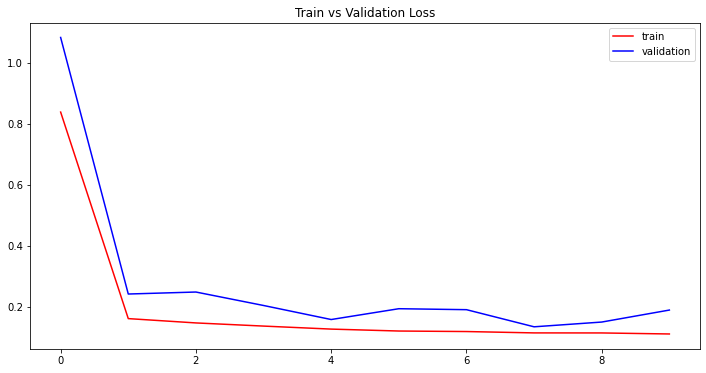

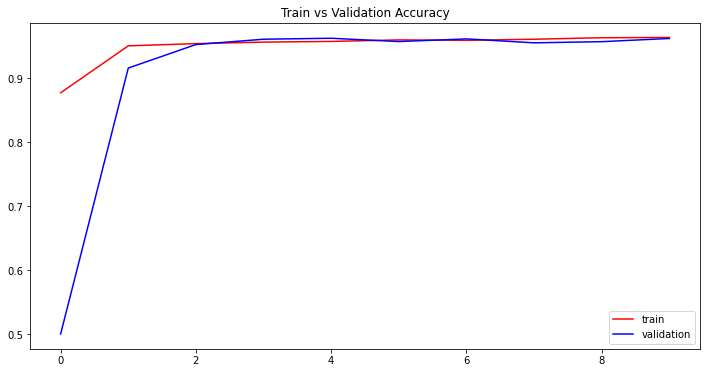

In [14]:
#Get model history
history=model_4.history

# Train vs Validation loss
plt.figure(figsize=(12, 6))
plt.title("Train vs Validation Loss")
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


# Train vs Validation Accuracy
plt.figure(figsize=(12, 6))
plt. title("Train vs Validation Accuracy")
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
#Train , Validation and Testv Accuracy
train_loss, train_accuracy = model_4.evaluate(x=X_train, y=y_train_enc, verbose=0)
val_loss, val_accuracy = model_4.evaluate(x=X_val, y=y_val_enc, verbose=0)
test_loss, test_accuracy = model_4.evaluate(x=X_test, y=y_test_enc, verbose=0)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:" , val_accuracy)
print("Test_Accuracy:" ,test_accuracy)

Train Accuracy: 0.9689980745315552
Validation Accuracy: 0.9626666903495789
Test_Accuracy: 0.9622234106063843


In [19]:
# Classification Report
from sklearn.metrics import classification_report

y_pred = model_4.predict(X_test)  # Get predicted labels
#y_train_enc = y_test  # Get true labels
)
#y_pred_classes = np.argmax(y_pred, axis=1)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
# Print classification report
report = classification_report(y_test_enc, y_pred_classes)
print(report)

174/174 [==============================] - 82s 463ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2779
           1       0.98      0.95      0.96      2780

    accuracy                           0.96      5559
   macro avg       0.96      0.96      0.96      5559
weighted avg       0.96      0.96      0.96      5559



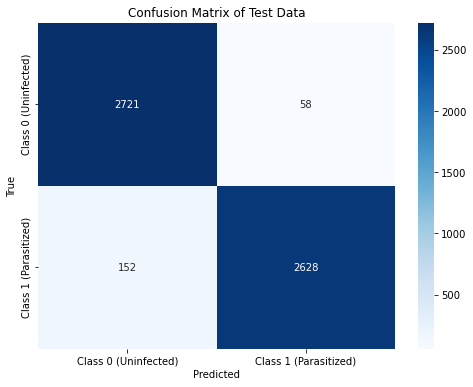

In [20]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model_4.predict(X_test)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
cm = confusion_matrix(y_test_enc, y_pred_classes)
labels = ['Class 0 (Uninfected)', 'Class 1 (Parasitized)']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Test Data')
plt.show()


Our model has shown impressive performance, achieving the highest accuracy of 96.22% on the test data so far. However, it is worth noting that there has been an increase in false negatives compared to our previous model.On the positive side, there has been a significant decrease in false positives, indicating that the model is becoming more accurate in identifying uninfected cells correctly.

<h4>VGG16</h4>

In [12]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import optimizers

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create a new sequential model
model_5 = Sequential()

# Add the InceptionV3 base model to the new model
model_5.add(base_model)

# Flatten the output from the base model
model_5.add(Flatten())

# Add a fully connected layer with 1024 units and ReLU activation
model_5.add(Dense(1024, activation='relu'))

# Add dropout layer to prevent overfitting
model_5.add(Dropout(0.5))

# Add the final output layer with sigmoid activation for binary classification
model_5.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer and binary cross-entropy loss
model_5.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model_5.summary()

80134624/80134624 [==============================] - 77s 1us/step


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              8389632   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 28,415,041
Trainable params: 28,415,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Training
model_5.fit(x=X_train, y=y_train_enc,
          validation_data=(X_val, y_val_enc),
          epochs=10,
          verbose=1,
          callbacks=[History()])

#model_1.save(model_save_path + "basic_model_cnn.h5")

In [ ]:
# saving model
model_5.save("Models/VGG16.h5")

# saving model history
with open('Models/history_VGG16.pkl', 'wb') as file:
    pickle.dump(model_5.history, file)

In [2]:
# Loading model
model_5 = keras.models.load_model('Models/VGG16.h5')

In [ ]:
#Get model history
history=model_6.history

# Train vs Validation loss
plt.figure(figsize=(12, 6))
plt.title("Train vs Validation Loss")
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


# Train vs Validation Accuracy
plt.figure(figsize=(12, 6))
plt. title("Train vs Validation Accuracy")
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
train_loss, train_accuracy = model_5.evaluate(x=X_train, y=y_train_enc, verbose=0)
val_loss, val_accuracy = model_5.evaluate(x=X_val, y=y_val_enc, verbose=0)
test_loss, test_accuracy = model_5.evaluate(x=X_test, y=y_test_enc, verbose=0)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:" , val_accuracy)
print("Test_Accuracy:" ,test_accuracy)

Train Accuracy: 0.96318519115448
Validation Accuracy: 0.9601666927337646
Test_Accuracy: 0.9598848819732666


In [10]:
# Classifiaction Report
from sklearn.metrics import classification_report

y_pred = model_5.predict(X_test)  # Get predicted labels
#y_train_enc = y_test  # Get true labels

#y_pred_classes = np.argmax(y_pred, axis=1)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
# Print classification report
report = classification_report(y_test_enc, y_pred_classes)
print(report)

174/174 [==============================] - 121s 694ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2779
           1       0.97      0.95      0.96      2780

    accuracy                           0.96      5559
   macro avg       0.96      0.96      0.96      5559
weighted avg       0.96      0.96      0.96      5559



174/174 [==============================] - 110s 632ms/step


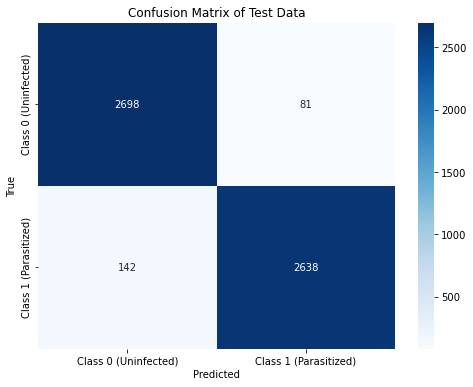

In [15]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model_5.predict(X_test)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
cm = confusion_matrix(y_test_enc, y_pred_classes)
labels = ['Class 0 (Uninfected)', 'Class 1 (Parasitized)']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Test Data')
plt.show()

Our model has achieved a reasonably good accuracy of 95.98% on the test data. While there has been a slight increase in false positives compared to the previous model, indicating some misclassifications of uninfected cells as infected, there has been a decrease in false negatives. Overall, the model performs well and shows potential for accurately detecting infected and uninfected cells.

<h4>Inception V3</h4>

In [22]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import optimizers

# Load the InceptionV3 model pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create a new sequential model
model_6 = Sequential()

# Add the InceptionV3 base model to the new model
model_6.add(base_model)

# Flatten the output from the base model
model_6.add(Flatten())

# Add a fully connected layer with 1024 units and ReLU activation
model_6.add(Dense(1024, activation='relu'))

# Add dropout layer to prevent overfitting
model_6.add(Dropout(0.5))

# Add the final output layer with sigmoid activation for binary classification
model_6.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer and binary cross-entropy loss
model_6.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)              8389632   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 30,193,441
Trainable params: 30,159,009
Non-trainable params: 34,432
_________________________________________________________________


In [23]:
# Model Training
model_6.fit(x=X_train, y=y_train_enc,
          validation_data=(X_val, y_val_enc),
          epochs=10,
          verbose=1,
          callbacks=[History()])

Epoch 1/10
500/500 [==============================] - 790s 2s/step - loss: 0.3726 - accuracy: 0.9062 - val_loss: 0.4295 - val_accuracy: 0.9580
Epoch 2/10
500/500 [==============================] - 792s 2s/step - loss: 0.1817 - accuracy: 0.9502 - val_loss: 4.2822 - val_accuracy: 0.9078
Epoch 3/10
500/500 [==============================] - 907s 2s/step - loss: 0.1476 - accuracy: 0.9546 - val_loss: 0.2573 - val_accuracy: 0.9440
Epoch 4/10
500/500 [==============================] - 915s 2s/step - loss: 0.1260 - accuracy: 0.9588 - val_loss: 0.2528 - val_accuracy: 0.9618
Epoch 5/10
500/500 [==============================] - 815s 2s/step - loss: 0.1218 - accuracy: 0.9600 - val_loss: 0.4773 - val_accuracy: 0.9617
Epoch 6/10
500/500 [==============================] - 795s 2s/step - loss: 0.1158 - accuracy: 0.9624 - val_loss: 0.1187 - val_accuracy: 0.9662
Epoch 7/10
500/500 [==============================] - 802s 2s/step - loss: 0.1090 - accuracy: 0.9640 - val_loss: 0.1161 - val_accuracy: 0.9640

In [24]:
# saving model
model_6.save("Models/InceptionV3.h5")

# saving model history
with open('Models/history_InceptionV3.pkl', 'wb') as file:
    pickle.dump(model_6.history, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\functional
......vars
...layers\functional\layers\activation
......vars
...layers\functional\layers\activation_1
......vars
...layers\functional\layers\activation_10
......vars
...layers\functional\layers\activation_11
......vars
...layers\functional\layers\activation_12
......vars
...layers\functional\layers\activation_13
......vars
...layers\functional\layers\activation_14
......vars
...layers\functional\layers\activation_15
......vars
...layers\functional\layers\activation_16
......vars
...layers\functional\layers\activation_17
......vars
...layers\functional\layers\activation_18
......vars
...layers\functional\layers\activation_19
......vars
...layers\functional\layers\activation_2
......vars
...layers\functional\layers\activation_20
......vars
...laye

Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-25 16:42:41       150422
metadata.json                                  2023-05-25 16:42:41           64
variables.h5                                   2023-05-25 16:42:42    242272584


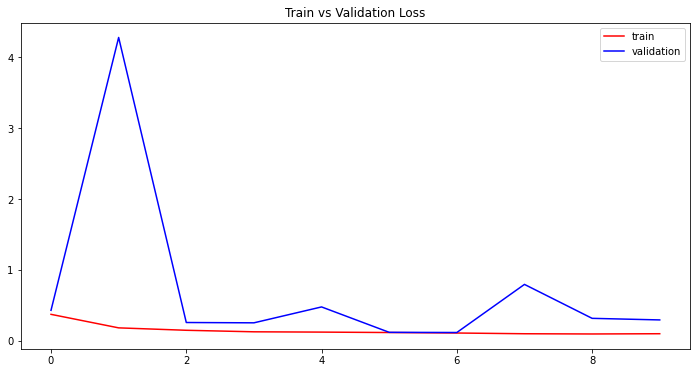

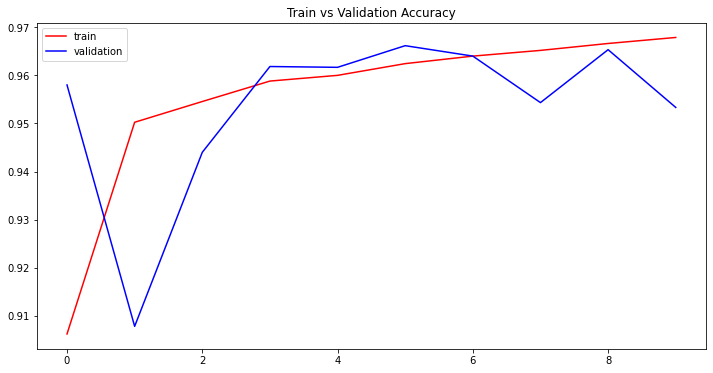

In [25]:
#Get model history
history=model_6.history

# Train vs Validation loss
plt.figure(figsize=(12, 6))
plt.title("Train vs Validation Loss")
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


# Train vs Validation Accuracy
plt.figure(figsize=(12, 6))
plt. title("Train vs Validation Accuracy")
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [26]:
#Train, Validation and Test Accuracy
train_loss, train_accuracy = model_6.evaluate(x=X_train, y=y_train_enc, verbose=0)
val_loss, val_accuracy = model_6.evaluate(x=X_val, y=y_val_enc, verbose=0)
test_loss, test_accuracy = model_6.evaluate(x=X_test, y=y_test_enc, verbose=0)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:" , val_accuracy)
print("Test_Accuracy:" ,test_accuracy)

Train Accuracy: 0.9641852378845215
Validation Accuracy: 0.95333331823349
Test_Accuracy: 0.9539485573768616


In [27]:
#Classification Report
from sklearn.metrics import classification_report

y_pred = model_6.predict(X_test)  # Get predicted labels
#y_train_enc = y_test  # Get true labels

#y_pred_classes = np.argmax(y_pred, axis=1)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
# Print classification report
report = classification_report(y_test_enc, y_pred_classes)
print(report)

174/174 [==============================] - 31s 170ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2779
           1       0.95      0.96      0.95      2780

    accuracy                           0.95      5559
   macro avg       0.95      0.95      0.95      5559
weighted avg       0.95      0.95      0.95      5559



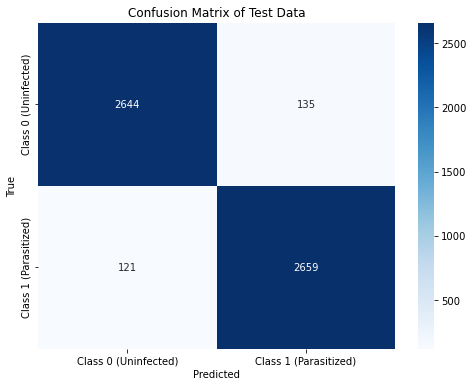

In [28]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#y_pred = model_6.predict(X_test)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
cm = confusion_matrix(y_test_enc, y_pred_classes)
labels = ['Class 0 (Uninfected)', 'Class 1 (Parasitized)']  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Test Data')
plt.show()

Our Inception V3 model has demonstrated impressive performance with a high accuracy of 95.39% on the test data. It is noteworthy that we have significantly reduced the number of false negatives, with only 121 instances, which is the lowest among all our previous models. This indicates that the model is effectively identifying infected cells. The overall test accuracy is also commendable. These results highlight the effectiveness of our model in accurately classifying infected and uninfected cells.

<h3> Results </h3>

In [9]:
# results
from prettytable import PrettyTable
  
myTable = PrettyTable(["Models", "Train Accuracy", "Validation Accuracy", "Test Accuracy", "False Negatives"])
  
# Add rows
myTable.add_row(["Baseline CNN Model", "1.0", "0.9356", "0.9435","194"])
myTable.add_row(["CNN + Dropout + Weights Initialize", "0.9928", "0.9574", "0.9553", "145"])
myTable.add_row(["CNN + Dropout + Weights Initialize+ Batch Norm", "0.9771", "0.9606","0.9589","133"])
myTable.add_row(["ResNet-50", "0.9689", "0.9626", "0.9622", "152"])
myTable.add_row(["VGG-16", "0.9631", "0.9601", "0.9598","142"])
myTable.add_row(["Inception V3", "0.9641", "0.9533", "0.9539","121"])

print(myTable)

+------------------------------------------------+----------------+---------------------+---------------+-----------------+
|                     Models                     | Train Accuracy | Validation Accuracy | Test Accuracy | False Negatives |
+------------------------------------------------+----------------+---------------------+---------------+-----------------+
|               Baseline CNN Model               |      1.0       |        0.9356       |     0.9435    |       194       |
|       CNN + Dropout + Weights Initialize       |     0.9928     |        0.9574       |     0.9553    |       145       |
| CNN + Dropout + Weights Initialize+ Batch Norm |     0.9771     |        0.9606       |     0.9589    |       133       |
|                   ResNet-50                    |     0.9689     |        0.9626       |     0.9622    |       152       |
|                     VGG-16                     |     0.9631     |        0.9601       |     0.9598    |       142       |
|       

The Inception V3 model seems to perform the best among the provided options. It has the lowest number of false negatives (121) and achieves relatively high accuracy on both the validation and test sets. Additionally, the Inception V3 model has a slightly lower validation accuracy compared to some other models but still maintains good overall performance.


<h4>Prediction</h4>

In [61]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import imageio
def predict(image_path):

    # loading model
    model = load_model('Models/InceptionV3.h5')

    #read image
    image = imageio.imread(image_path)
    
    # show image
    plt.imshow(image)

    # resize image into 128 *128
    resized_image = resize_image(image)
    
    # convert into numpy array
    image_array = np.array(resized_image)

    # rescale image (0 - 1)
    rescaled_image = image_array.astype(np.float32) / 255.0

    # expanding dimensions
    # (1, 128, 128, 3)--> (1, image_height, image_width, num_channels)
    input_image = np.expand_dims(rescaled_image, axis=0)
    
    pred = model.predict(input_image)
    
    # Convert the prediction to a label
    if pred[0] > 0.5:
        label = 'Parasitized cell'
    else:
        label = 'Uninfected cell'
    return print("Prediction : ", label)


1/1 [==============================] - 1s 1s/step
Prediction :  Uninfected cell


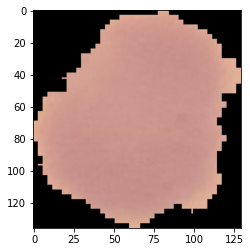

In [62]:
# uninfected image
predict("dataset/cell_images/Uninfected/C4thin_original_IMG_20150608_170038_cell_65.png")

1/1 [==============================] - 1s 1s/step
Prediction :  Parasitized cell


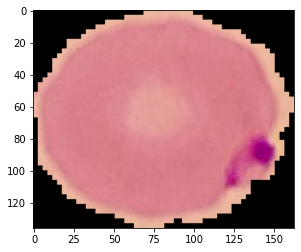

In [50]:
# parasitized cell
predict("dataset\cell_images\Parasitized\C37BP2_thinF_IMG_20150620_133205a_cell_87.png")

1/1 [==============================] - 1s 1s/step
Prediction :  Uninfected cell


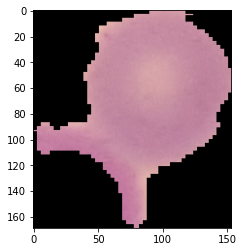

In [51]:
# Uninfected cell 
predict("dataset/cell_images/Uninfected/C6NThinF_IMG_20150609_122547_cell_205.png")

1/1 [==============================] - 1s 1s/step
Prediction :  Parasitized cell


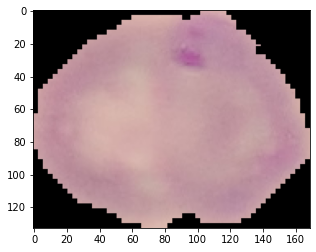

In [54]:
# parasitized cell
predict("dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105253_cell_90.png")